In [ ]:
pip install keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00


Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
17/17 [==============================] - 137s 8s/step


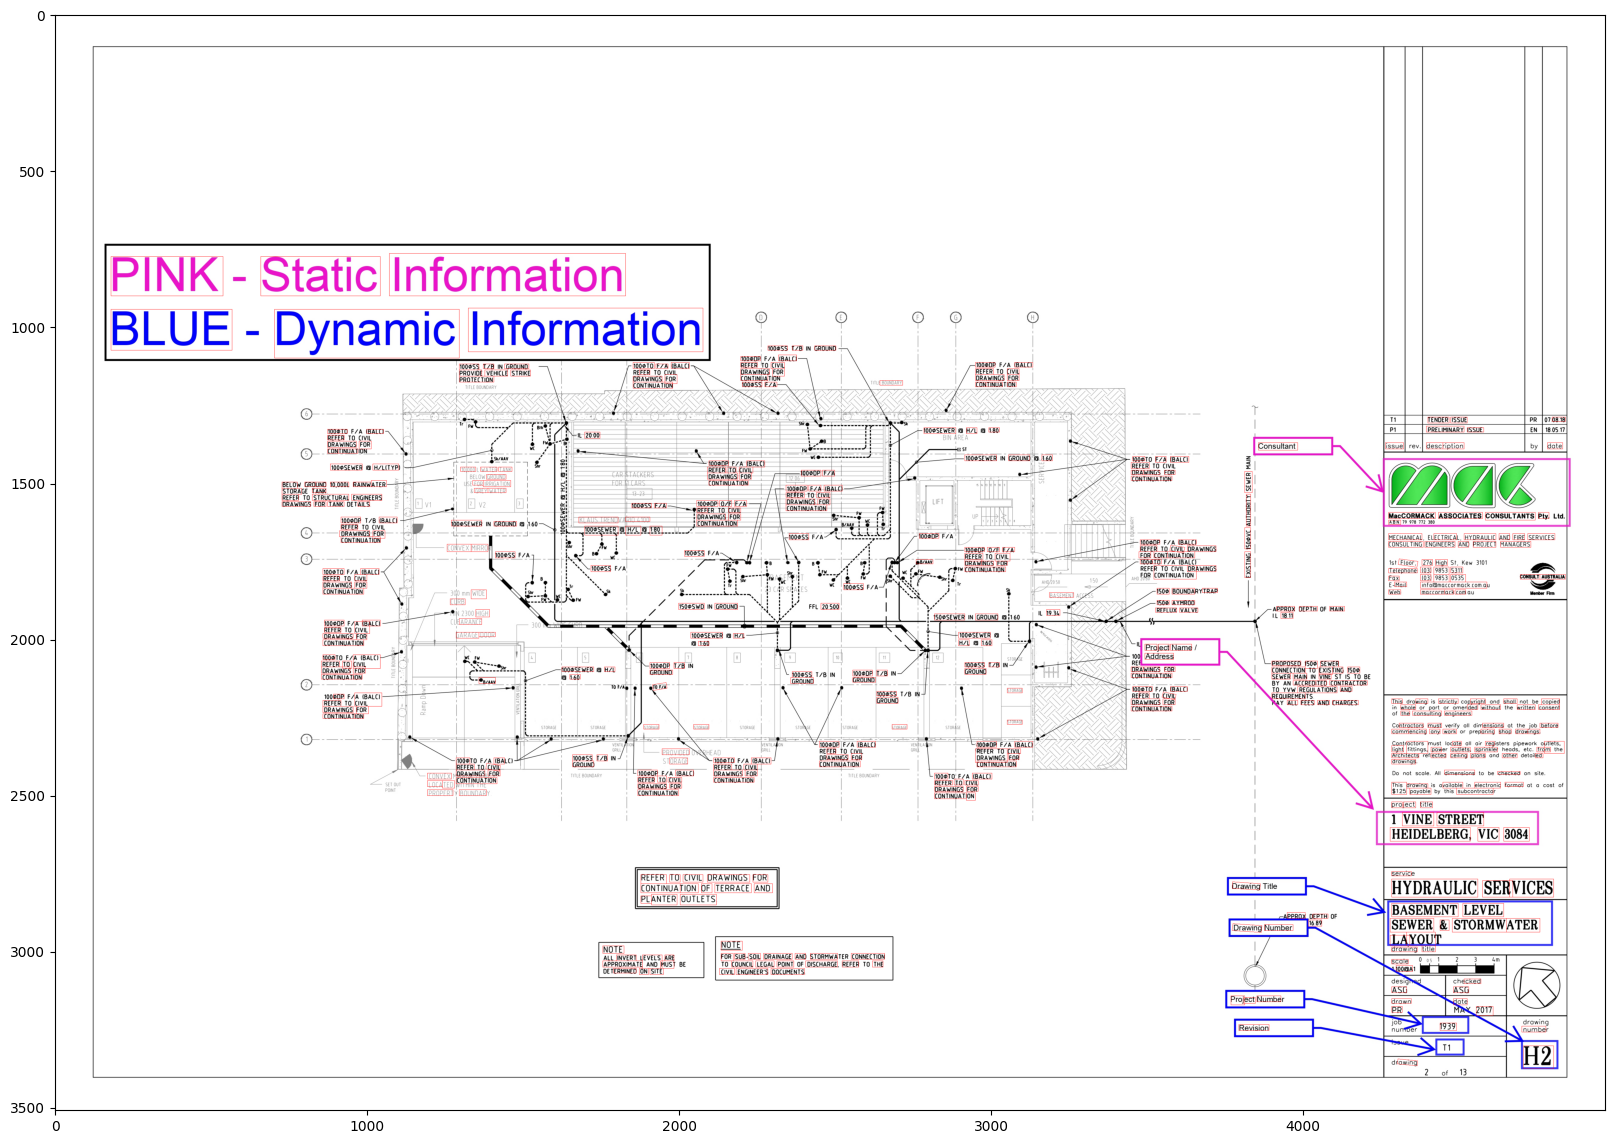

In [ ]:
import keras_ocr
from keras_ocr import detection,recognition
import matplotlib.pyplot as plt
import pandas as pd

images = [keras_ocr.tools.read(img) for img in ["/content/Drawing Detail Sample Markup3_page-0001.jpg"]]
pipeline = keras_ocr.pipeline.Pipeline()
results=pipeline.recognize(images)

df = pd.DataFrame(results[0],columns=["Text","Bounding_Boxes"])
Bounding_boxes = df["Bounding_Boxes"].values

plt.figure(figsize = (20,20))
plt.imshow(keras_ocr.tools.drawBoxes(plt.imread("/content/Drawing Detail Sample Markup3_page-0001.jpg"),Bounding_boxes,thickness=1))

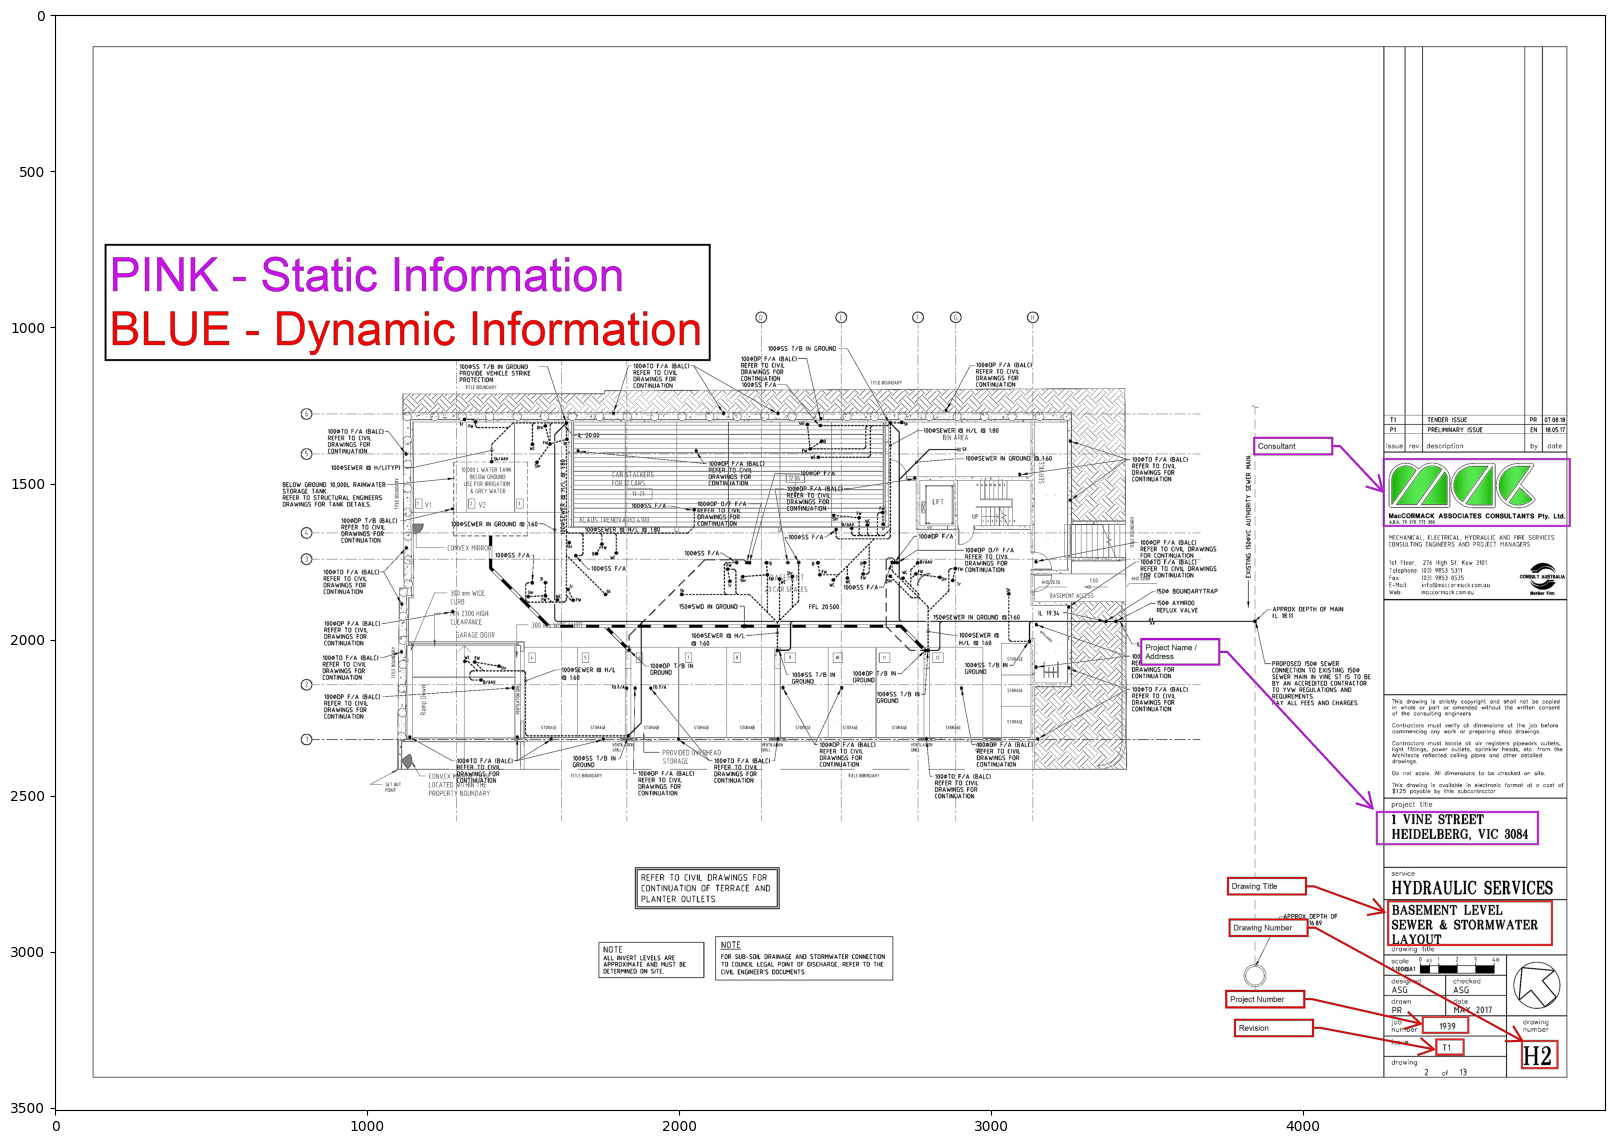

In [ ]:
import cv2
from PIL import Image
import numpy as np

img = cv2.imread("/content/Drawing Detail Sample Markup3_page-0001.jpg")

sharpening_filter = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened_image= cv2.filter2D(img,-1,sharpening_filter)
plt.figure(figsize = (20,20))
plt.imshow(sharpened_image)

17/17 [==============================] - 145s 9s/step


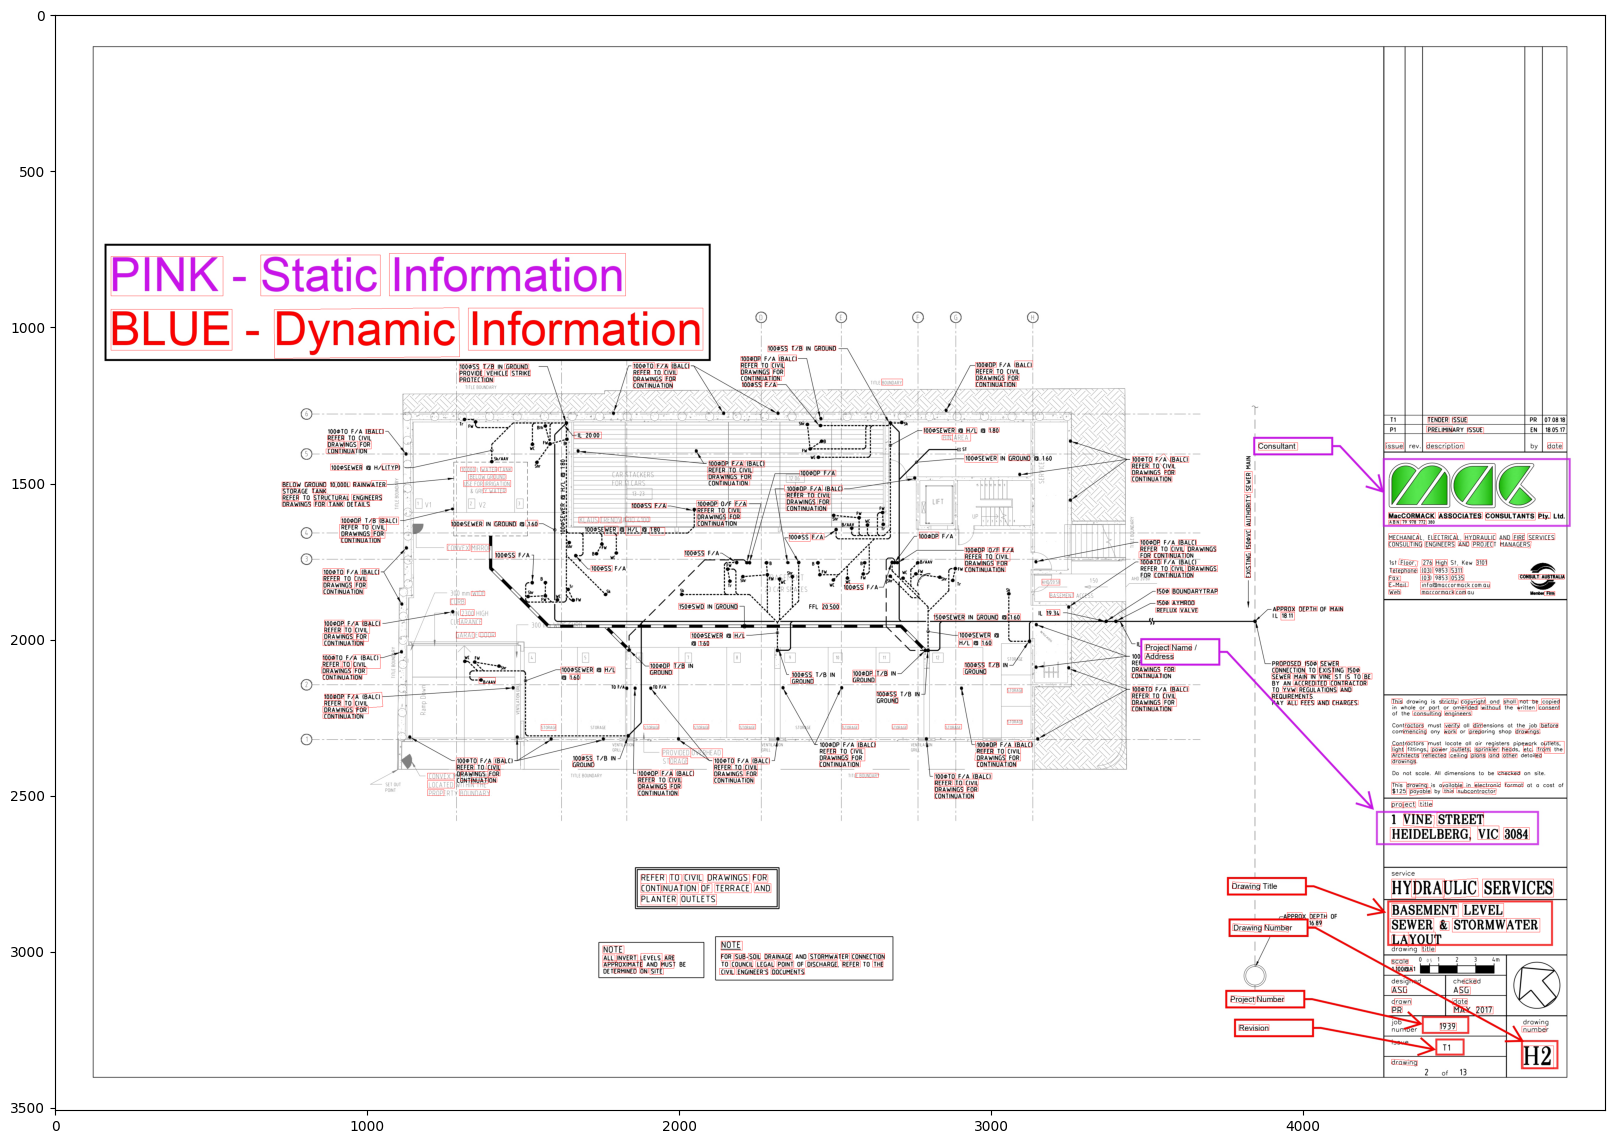

In [ ]:
results1 = pipeline.recognize([sharpened_image])
# Assuming results1 contains bounding boxes in the 'boxes' format
df1 = pd.DataFrame(results1[0], columns=["Text", "Bounding_Boxes"])

plt.figure(figsize=(20, 20))
plt.imshow(keras_ocr.tools.drawBoxes(img, boxes=df1['Bounding_Boxes'], thickness=1, boxes_format='boxes'))

In [ ]:
result_image = sharpened_image.copy()
mask = np.ones(result_image.shape, dtype=np.uint8) * 255
gray = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
dilate = cv2.dilate(thresh, kernel, iterations=3)

cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
        x,y,w,h = cv2.boundingRect(c)
        mask[y:y+h, x:x+w] = result_image[y:y+h, x:x+w]

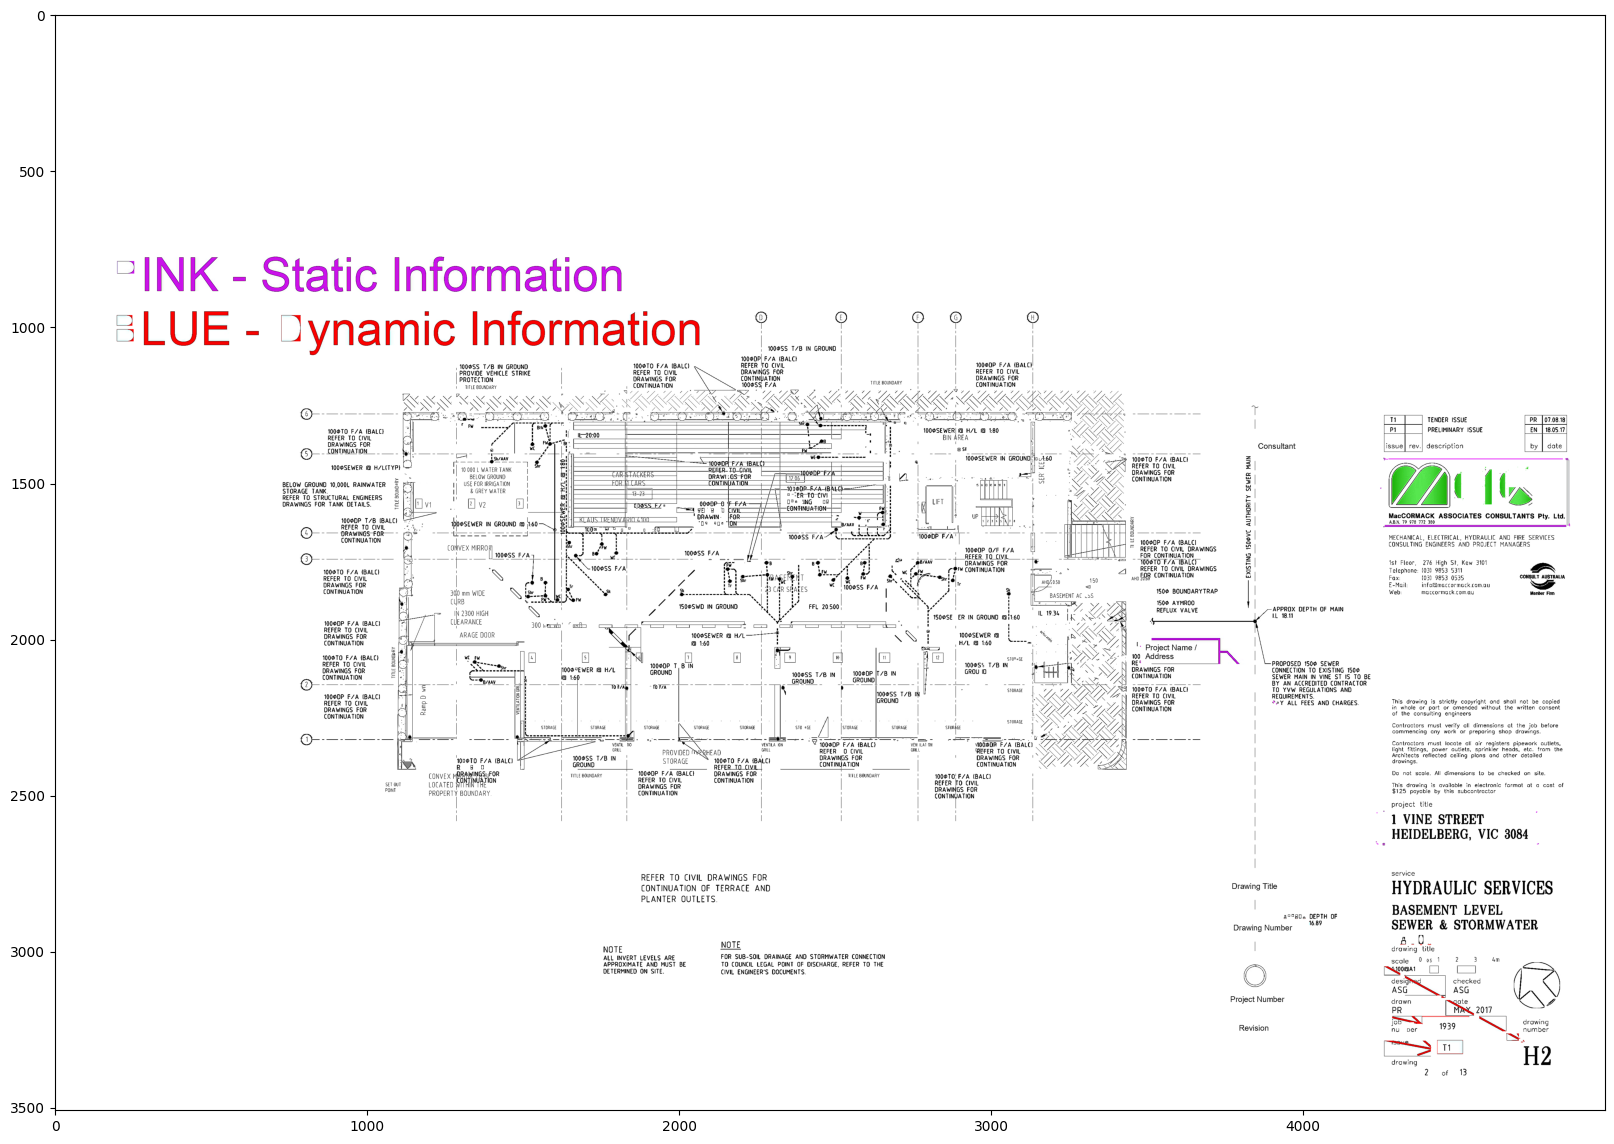

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(mask)

16/16 [==============================] - 130s 8s/step


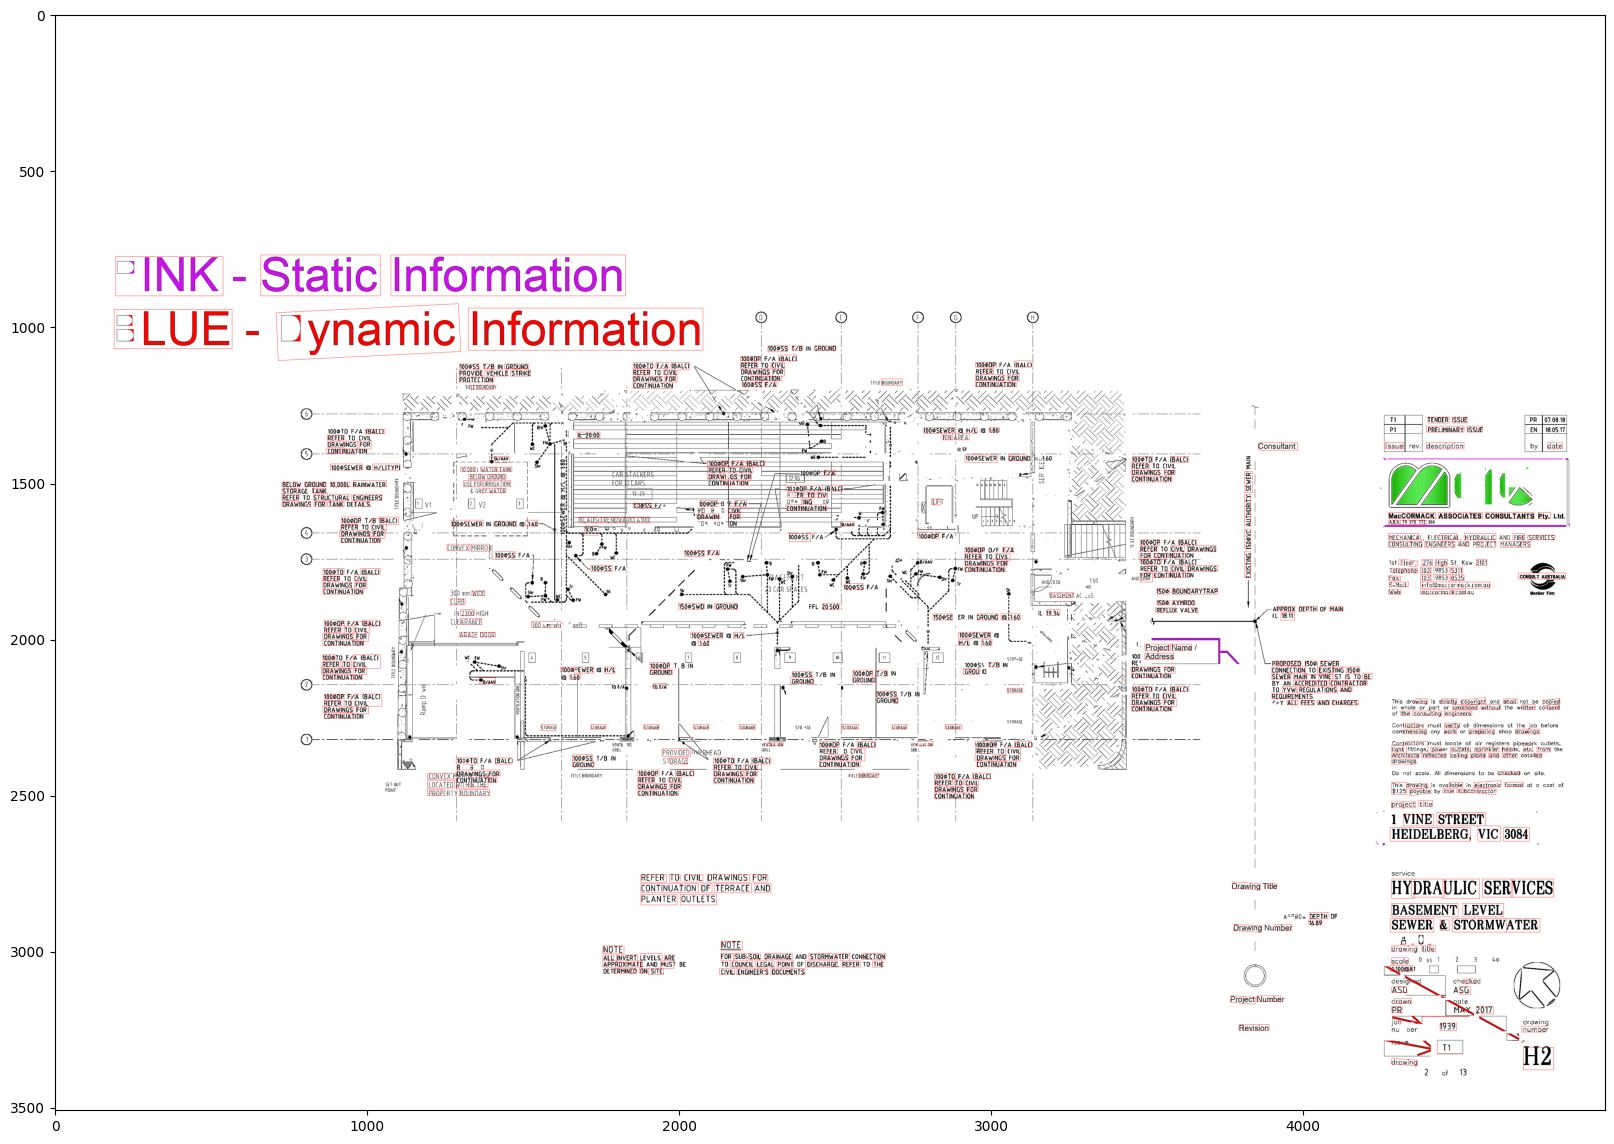

In [ ]:
results1=pipeline.recognize([mask])
df1 = pd.DataFrame(results1[0],columns=["Text","Bounding_Boxes"])
Bounding_boxes1 = df1["Bounding_Boxes"].values
plt.figure(figsize = (20,20))
plt.imshow(keras_ocr.tools.drawBoxes(mask,Bounding_boxes1,thickness=1))

In [ ]:
df1

,Text,Bounding_Boxes
0,static,"[[659.6797, 771.24316], [1042.876, 771.24316],..."
1,information,"[[1076.8301, 771.24316], [1828.6709, 771.24316..."
2,dink,"[[194.02344, 776.09375], [538.41504, 776.09375..."
3,elue,"[[189.17285, 945.86426], [567.51855, 945.86426..."
4,dynamic,"[[708.24585, 956.7752], [1292.7355, 927.5507],..."
...,...,...
504,et,"[[4438.286, 3230.4902], [4491.6426, 3230.4902]..."
505,fenision,"[[3793.1582, 3235.3408], [3890.17, 3235.3408],..."
506,rlitbe,"[[4700.218, 3240.1914], [4777.827, 3240.1914],..."
507,h2,"[[4705.0684, 3308.0996], [4802.08, 3308.0996],..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>